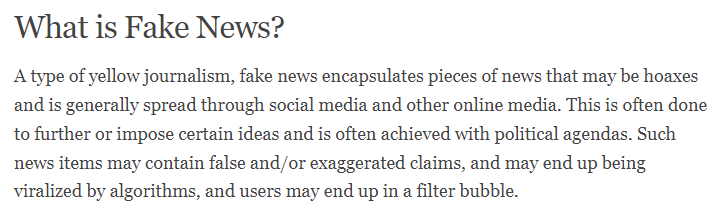

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv("./data/news.csv")

In [4]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
# Separando varaivael preditora e target
x = dataset[["text"]]
y = dataset['label']
x.tail()

,text
6330,The State Department told the Republican Natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligar...
6333,"ADDIS ABABA, Ethiopia —President Obama convene..."
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...


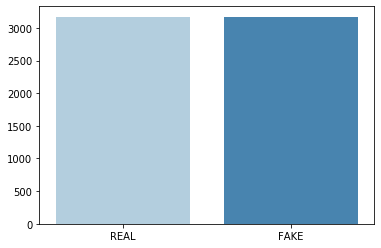

In [7]:
# Variavel target bem equilibrada
sns.barplot(y.value_counts().index, y.value_counts().values, palette="Blues")

In [47]:
# Função para remover stopwords
def remove_stopwords(instancia):
    
    # Lista de Stopwords
    stopwords = nltk.corpus.stopwords.words('English') + [',','.']
    
    # Split das frases
    palavras = [i for i in instancia.split() if not i in stopwords]
    
    #juntar a lista através da função join
    return (" ".join(palavras))

# Outra função para remover stopwords
def remove_stopwords_2(instancia):
    
    # Lista de Stopwords
    stopwords = nltk.corpus.stopwords.words('English') + [',', '.']
    
    # Split das sentanças utilizando a biblioteca nltk
    palavras = [i for i in nltk.word_tokenize(instancia) if not i in stopwords]
    
    # juntar a lista através da função join
    return (" ".join(palavras))

## Modelo 1

##### Apenas utilizando a técnica de retirar as stopwords da base de dados

In [48]:
# Removendo Stopwords
x_2 = pd.DataFrame(map(remove_stopwords_2, x['text']), columns=['text'])
x_2.head()

,text
0,Daniel Greenfield Shillman Journalism Fellow F...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,U.S. Secretary State John F. Kerry said Monday...
3,— Kaydee King ( @ KaydeeKing ) November 9 2016...
4,It 's primary day New York front-runners Hilla...


In [49]:
# Dividindo os dados em dados de treino e teste
x_train,x_test,y_train,y_test=train_test_split(x_2['text'], y, test_size=0.2, random_state=7)

In [50]:
# Instanciando o algoritmo TFIDF. Dar maior peso para palavras que aparecem poucas vezes no texto, criando colunas com palavras
# que tem como valor o peso.
model_transf = TfidfVectorizer()

# Treinamento do modelo
x_vect_train = model_transf.fit_transform(x_train)

# Transformando dados de teste
x_vect_test = model_transf.transform(x_test)

x_vect_train.shape

(5068, 61953)

In [51]:
# Instaciando o algoritmo Naive Bayes
bayes = MultinomialNB()

# Treino dos dados
bayes.fit(x_vect_train, y_train)

# Previsao dos dados de teste
y_predict = bayes.predict(x_vect_test)

# Acurácia do modelo
acc_bayes = accuracy_score(y_test, y_predict)

print("-"*100)
print(f"Acurácia com o algoritmo PassiveAgressive = {acc_bayes*100}% ")
print("-"*100)

----------------------------------------------------------------------------------------------------
Acurácia com o algoritmo PassiveAgressive = 84.37253354380427% 
----------------------------------------------------------------------------------------------------


In [52]:
# Instaciando o algoritmo PassiveAgressive
pas = PassiveAggressiveClassifier()

# Treino dos dados
pas.fit(x_vect_train, y_train)

# Previsao dos dados de teste
y_predict_pas = pas.predict(x_vect_test)

# Acurácia do modelo
acc_pas = accuracy_score(y_test, y_predict_pas)

print("-"*100)
print(f"Acurácia com o algoritmo PassiveAgressive = {acc_pas*100}% ")
print("-"*100)

----------------------------------------------------------------------------------------------------
Acurácia com o algoritmo PassiveAgressive = 92.97553275453828% 
----------------------------------------------------------------------------------------------------


## Modelo 2

##### Além de usar a técnica de stopwords, também será utilizado o stemming

In [53]:
# Outra função para remover stopwords e stemming
def remove_stopwords_stem(instancia):
    
    # Lista de Stopwords
    stopwords = nltk.corpus.stopwords.words('English') + [',', '.']
    
    # Split das sentanças utilizando a biblioteca nltk
    palavras = [i for i in nltk.word_tokenize(instancia) if not i in stopwords]
    
    ps = PorterStemmer()
    palavras_stem = [ps.stem(x) for x in palavras]
    
    # juntar a lista através da função join
    return (" ".join(palavras_stem))

In [54]:
x_stem = pd.DataFrame(map(remove_stopwords_stem, x['text']), columns=['text'])
x_stem.head()

,text
0,daniel greenfield shillman journal fellow free...
1,googl pinterest digg linkedin reddit stumbleup...
2,u.s. secretari state john F. kerri said monday...
3,— kayde king ( @ kaydeek ) novemb 9 2016 the l...
4,It 's primari day new york front-runn hillari ...


In [55]:
# Dividindo os dados em dados de treino e teste
x_train,x_test,y_train,y_test=train_test_split(x_stem['text'], y, test_size=0.2, random_state=7)

In [56]:
# Instanciando algoritmo
model_transf = TfidfVectorizer()

# Treinamento do modelo
x_vect_train = model_transf.fit_transform(x_train)

# Transformando dados de teste
x_vect_test = model_transf.transform(x_test)

x_vect_train.shape

(5068, 45860)

In [57]:
# Instaciando o algoritmo Naive Bayes
bayes = MultinomialNB()

# Treino dos dados
bayes.fit(x_vect_train, y_train)

# Previsao dos dados de teste
y_predict = bayes.predict(x_vect_test)

# Acurácia do modelo
acc_bayes = accuracy_score(y_test, y_predict)

print("-"*100)
print(f"Acurácia com o algoritmo PassiveAgressive = {acc_bayes*100}% ")
print("-"*100)

----------------------------------------------------------------------------------------------------
Acurácia com o algoritmo PassiveAgressive = 84.13575374901342% 
----------------------------------------------------------------------------------------------------


In [58]:
# Instaciando o algoritmo PassiveAgressive
pas = PassiveAggressiveClassifier()

# Treino dos dados
pas.fit(x_vect_train, y_train)

# Previsao dos dados de teste
y_predict_pas = pas.predict(x_vect_test)

# Acurácia do modelo
acc_pas = accuracy_score(y_test, y_predict_pas)

print("-"*100)
print(f"Acurácia com o algoritmo PassiveAgressive = {acc_pas*100}% ")
print("-"*100)

----------------------------------------------------------------------------------------------------
Acurácia com o algoritmo PassiveAgressive = 92.65982636148382% 
----------------------------------------------------------------------------------------------------
